<a href="https://colab.research.google.com/github/AnnaGass/DSA-SleepHealthData/blob/main/02_DataVisualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install python libraries and load packages

In [1]:
# @title Install needed libraries { display-mode: "both" }
!pip install pandas

In [2]:
# @title Import libraries { display-mode: "both" }
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from datetime import datetime
from sklearn.preprocessing import LabelEncoder

In [3]:
subject = "027"
final_csv = "base_data" + subject + ".csv"

output_directory = "results/"
output_boxplots = output_directory + "boxplots/"
output_histograms = output_directory + "histograms/"
output_signals = output_directory + "signals/"
output_correlation = output_directory + "corr-matrix/"
base_data = output_directory + "base_data.csv"

# Create folders if not exists
if not os.path.exists(output_directory):
  os.makedirs(output_directory)

if not os.path.exists(output_boxplots):
  os.makedirs(output_boxplots)

if not os.path.exists(output_histograms):
  os.makedirs(output_histograms)

if not os.path.exists(output_signals):
  os.makedirs(output_signals)

if not os.path.exists(output_correlation):
  os.makedirs(output_correlation)

# Data visualization

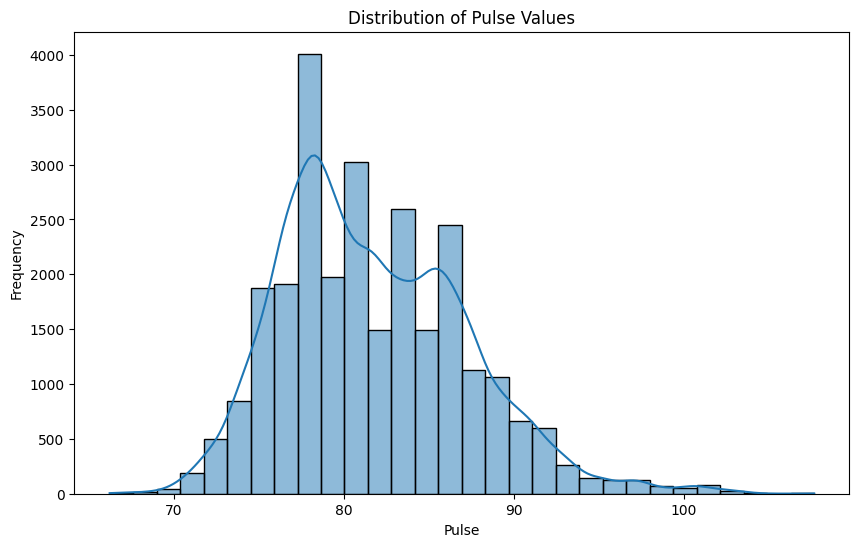

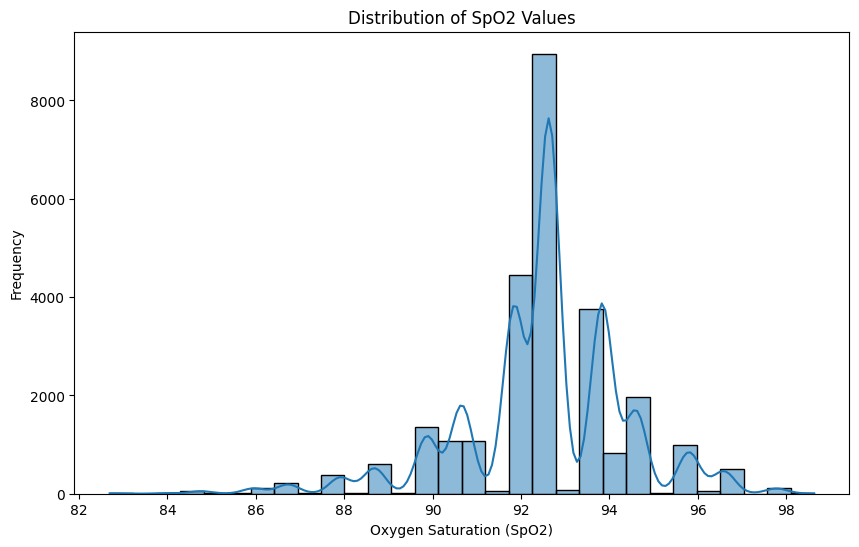

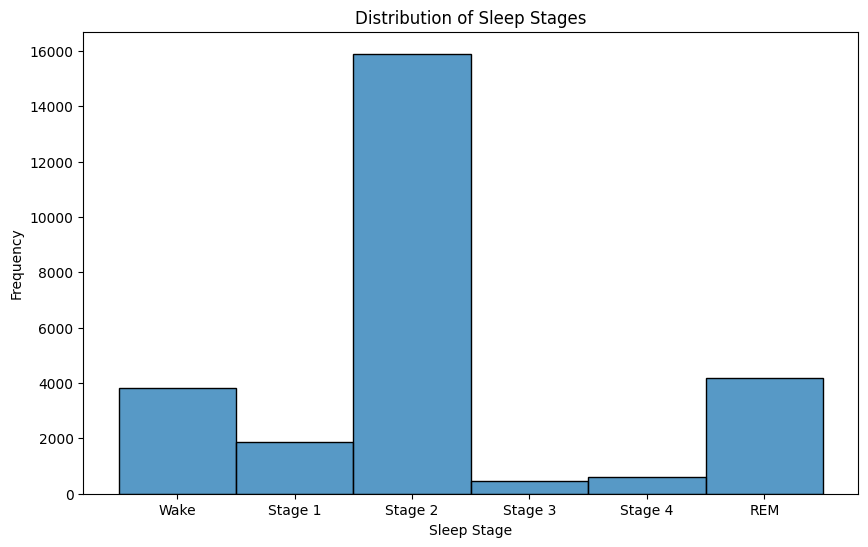

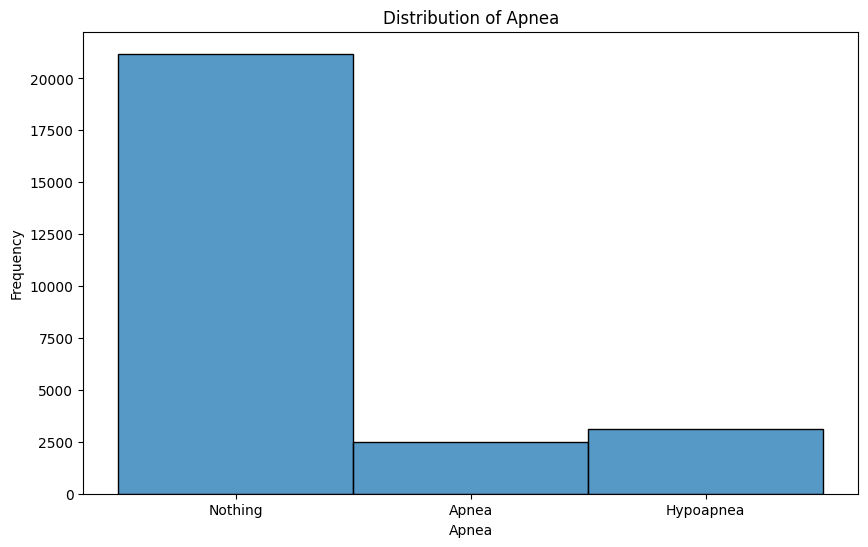

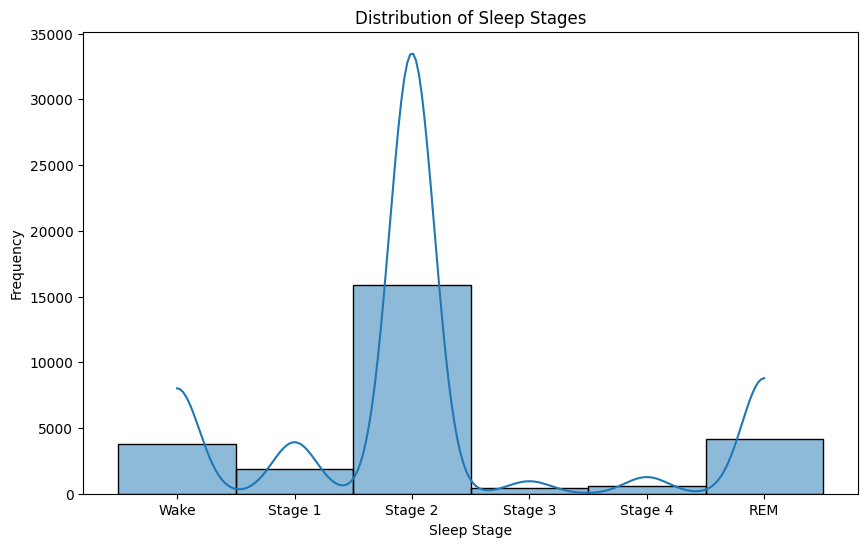

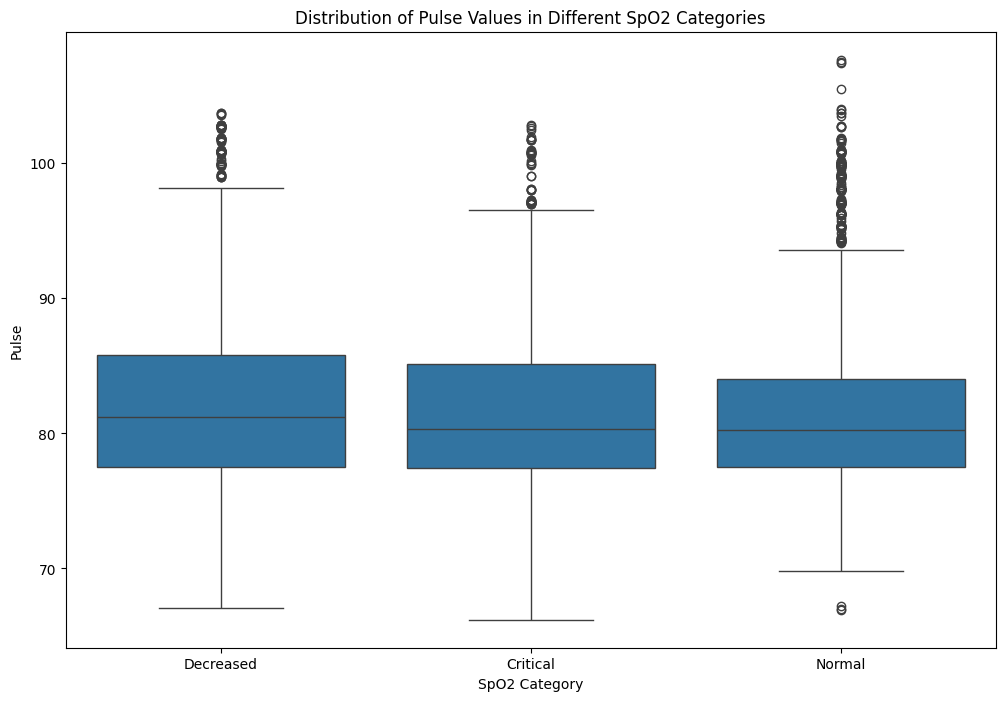

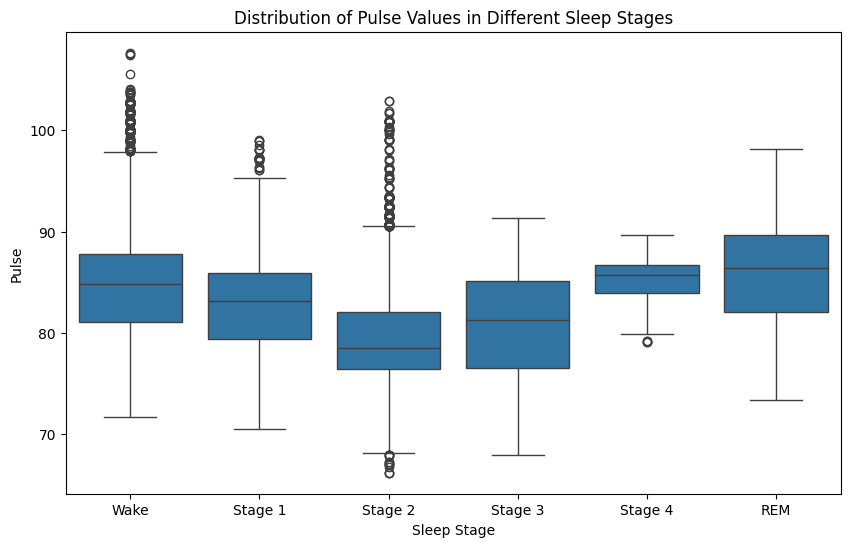

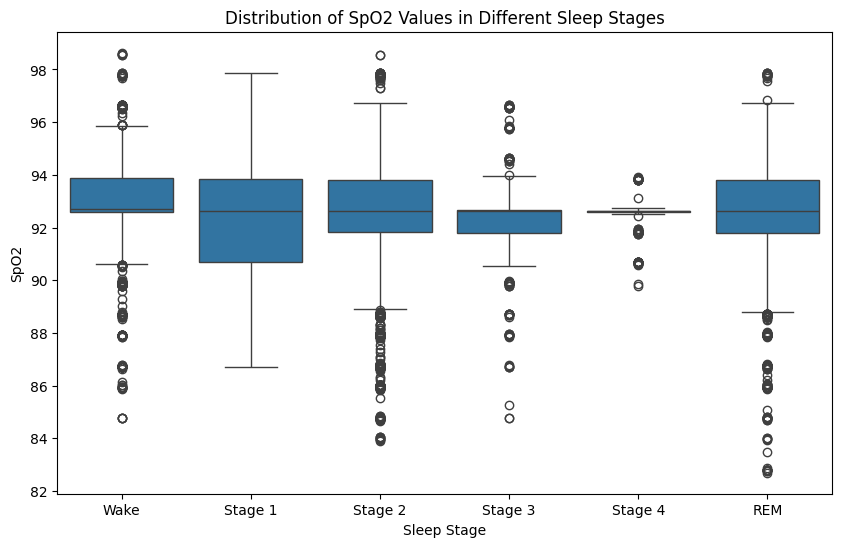

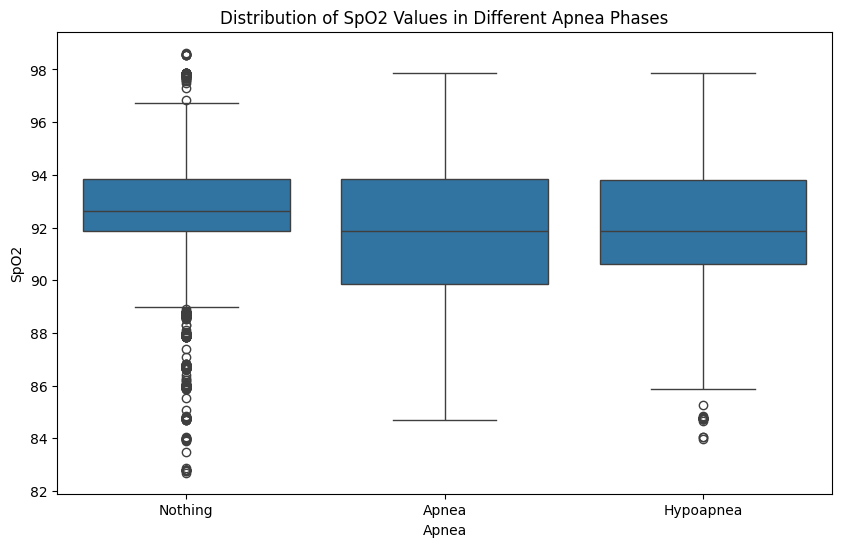

In [4]:
# @title Histograms and Boxplots { display-mode: "both" }

# Load the data
df = pd.read_csv(final_csv)

# Histogram of Pulse values
plt.figure(figsize=(10, 6))
sns.histplot(df['Pulse'], bins=30, kde=True)
plt.xlabel('Pulse')
plt.ylabel('Frequency')
plt.title('Distribution of Pulse Values')
plt.savefig(output_histograms + "Pulse.png")
plt.show()

# Histogram of SpO2 values
plt.figure(figsize=(10, 6))
sns.histplot(df['SpO2'], bins=30, kde=True)
plt.xlabel('Oxygen Saturation (SpO2)')
plt.ylabel('Frequency')
plt.title('Distribution of SpO2 Values')
plt.savefig(output_histograms + "Sp02.png")
plt.show()

# Histogram of Sleep Stages
plt.figure(figsize=(10, 6))
sns.histplot(df['Sleep Stage Text'])
plt.xlabel('Sleep Stage')
plt.ylabel('Frequency')
plt.title('Distribution of Sleep Stages')
plt.savefig(output_histograms + "SleepStage.png")
plt.show()

# Histogram of Apnea
plt.figure(figsize=(10, 6))
sns.histplot(df['Apnea'])
plt.xlabel('Apnea')
plt.ylabel('Frequency')
plt.title('Distribution of Apnea')
plt.savefig(output_histograms + "Apnea.png")
plt.show()

# Histogram of Sleep Stages
plt.figure(figsize=(10, 6))
sns.histplot(df['Sleep Stage Text'], kde=True)
plt.xlabel('Sleep Stage')
plt.ylabel('Frequency')
plt.title('Distribution of Sleep Stages')
plt.savefig(output_histograms + "SleepStage.png")
plt.show()

# Boxplot for Pulse values in different SpO2 categories
plt.figure(figsize=(12, 8))
sns.boxplot(x='SpO2 Category', y='Pulse', data=df)
plt.xlabel('SpO2 Category')
plt.ylabel('Pulse')
plt.title('Distribution of Pulse Values in Different SpO2 Categories')
plt.savefig(output_boxplots + "Sp02Cat-Pulse.png")
plt.show()

# Boxplot for Pulse values in different sleep stages
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sleep Stage Text', y='Pulse', data=df)
plt.xlabel('Sleep Stage')
plt.ylabel('Pulse')
plt.title('Distribution of Pulse Values in Different Sleep Stages')
plt.savefig(output_boxplots + "Pulse-SleepPhase.png")
plt.show()

# Boxplot for SpO2 values in different sleep stages
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sleep Stage Text', y='SpO2', data=df)
plt.xlabel('Sleep Stage')
plt.ylabel('SpO2')
plt.title('Distribution of SpO2 Values in Different Sleep Stages')
plt.savefig(output_boxplots + "SpO2-SleepPhase.png")
plt.show()

# Boxplot for SpO2 values in different Apnea phases
plt.figure(figsize=(10, 6))
sns.boxplot(x='Apnea', y='SpO2', data=df)
plt.xlabel('Apnea')
plt.ylabel('SpO2')
plt.title('Distribution of SpO2 Values in Different Apnea Phases')
plt.savefig(output_boxplots + "Apnea-Sp02.png")
plt.show()



Number of Apnea Events: 2489
Number of Hypopnea Events: 3104
Number of Nothing Events: 21190
Total Sleep Time in Hours: 7.44
Total AHI Index: 751.78


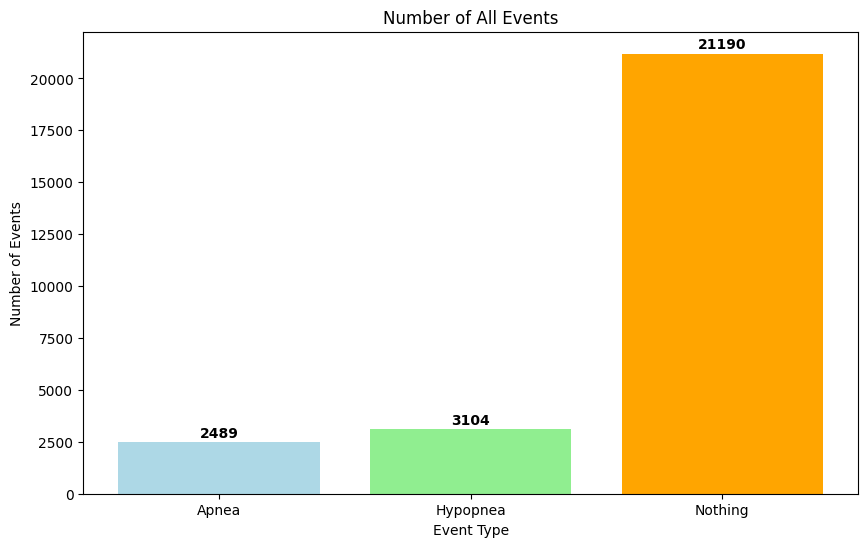

In [5]:
# @title Calculate AHI Index { display-mode: "both" }

# Load the data
df = pd.read_csv(final_csv)

output_file = output_directory + "ahi_index.txt"
output_graph = output_directory + "ahi.png"

# Count the number of Apnea and Hypopnea events
total_apnea_events = df[df['Apnea'] == 'Apnea'].shape[0]
total_hypoapnea_events = df[df['Apnea'] == 'Hypoapnea'].shape[0]
total_nothing_events = df[df['Apnea'] == 'Nothing'].shape[0]

print("Number of Apnea Events:", total_apnea_events)
print("Number of Hypopnea Events:", total_hypoapnea_events)
print("Number of Nothing Events:", total_nothing_events)

total_events = total_apnea_events + total_hypoapnea_events

# Calculate the total sleep time in hours, each row = one second of sleep
total_sleep_seconds = len(df)
total_sleep_hours = total_sleep_seconds / 3600

# Calculate the total AHI
ahi_total = total_events / total_sleep_hours

print(f"Total Sleep Time in Hours: {total_sleep_hours:.2f}")
print(f"Total AHI Index: {ahi_total:.2f}")

# Save the accuracy and classification report to a text file
with open(output_file, 'w') as f:
  f.write(f"Number of Apnea Events: {total_apnea_events}\n")
  f.write(f"Number of Hypopnea Events: {total_hypoapnea_events}\n")
  f.write(f"Number of Nothing Events: {total_nothing_events}\n")
  f.write(f"Total Sleep Time in Hours: {total_sleep_hours:.2f}\n")
  f.write(f"Total AHI Index: {ahi_total:.2f}\n")

plt.figure(figsize=(10, 6))
plt.bar(['Apnea', 'Hypopnea', 'Nothing'], [total_apnea_events, total_hypoapnea_events, total_nothing_events], color=['lightblue', 'lightgreen', 'orange'])
plt.xlabel('Event Type')
plt.ylabel('Number of Events')
plt.title('Number of All Events')

# Add annotations in the plot
for i, v in enumerate([total_apnea_events, total_hypoapnea_events, total_nothing_events]):
    plt.text(i, v + 100, str(v), ha='center', va='bottom', fontweight='bold')
plt.savefig(output_graph)
plt.show()

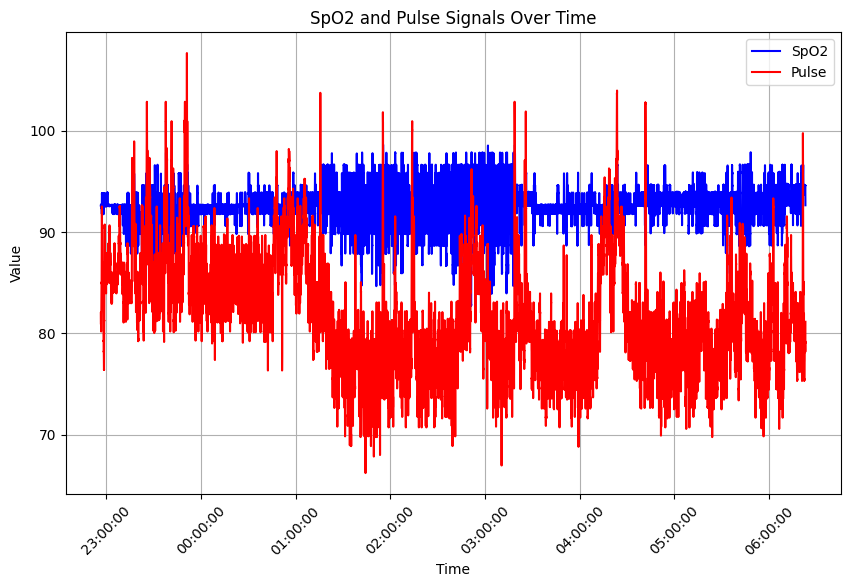

In [6]:
# @title Sp02 and Pulse Signals plot { display-mode: "both" }

# Load data
df = pd.read_csv(final_csv)

# Define the ouput for the diagramm
plot_png = output_signals + "signals_plot.png"

# Assuming the columns are in order: date, time, spo2, and pulse
date = df['Date']
time = df['Time']
spo2 = df['SpO2']
pulse = df['Pulse']

# Combine date and time into a single string column 'Timestamp'
df['Timestamp'] = df['Date'] + ' ' + df['Time']

# Parse each datetime string into a datetime object
datetime_objects = []
for dt_str in df['Timestamp']:
    try:
        # Try parsing with milliseconds
        dt_obj = datetime.strptime(dt_str, "%Y-%m-%d %H:%M:%S.%f")
    except ValueError:
        # If milliseconds are not present, parse without milliseconds
        dt_obj = datetime.strptime(dt_str, "%Y-%m-%d %H:%M:%S")
    datetime_objects.append(dt_obj)


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(datetime_objects, df['SpO2'], label='SpO2', color='blue')
plt.plot(datetime_objects, df['Pulse'], label='Pulse', color='red')

plt.title('SpO2 and Pulse Signals Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Set the format of the x-axis ticks to display only the time part
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Save the plot to a file
plt.savefig(plot_png)

plt.show()

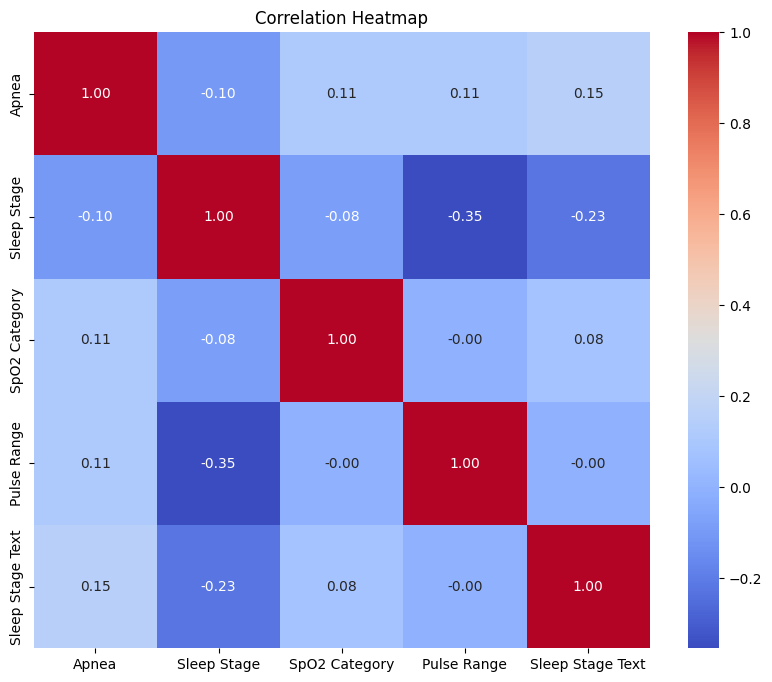

In [7]:
# @title Create Correlation Matrix { display-mode: "both" }

output_file = output_correlation + "correlation_matrix.txt"
output_image = output_correlation + "correlation_heatmap.png"

# Load the data
df = pd.read_csv(final_csv)

# Specify the columns to discard
columns_to_discard = ['Date', 'Time', 'SpO2', 'Pulse']

# Drop the specified columns
df = df.drop(columns=columns_to_discard)

# Encode categorical features
categorical_columns = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Calculate the correlation matrix
corr_matrix = df.corr()

# Save the correlation matrix to a text file
corr_matrix.to_csv(output_file, sep='\t')

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Set the title
plt.title('Correlation Heatmap')

# Save the heatmap to a file
plt.savefig(output_image)

# Show the heatmap
plt.show()


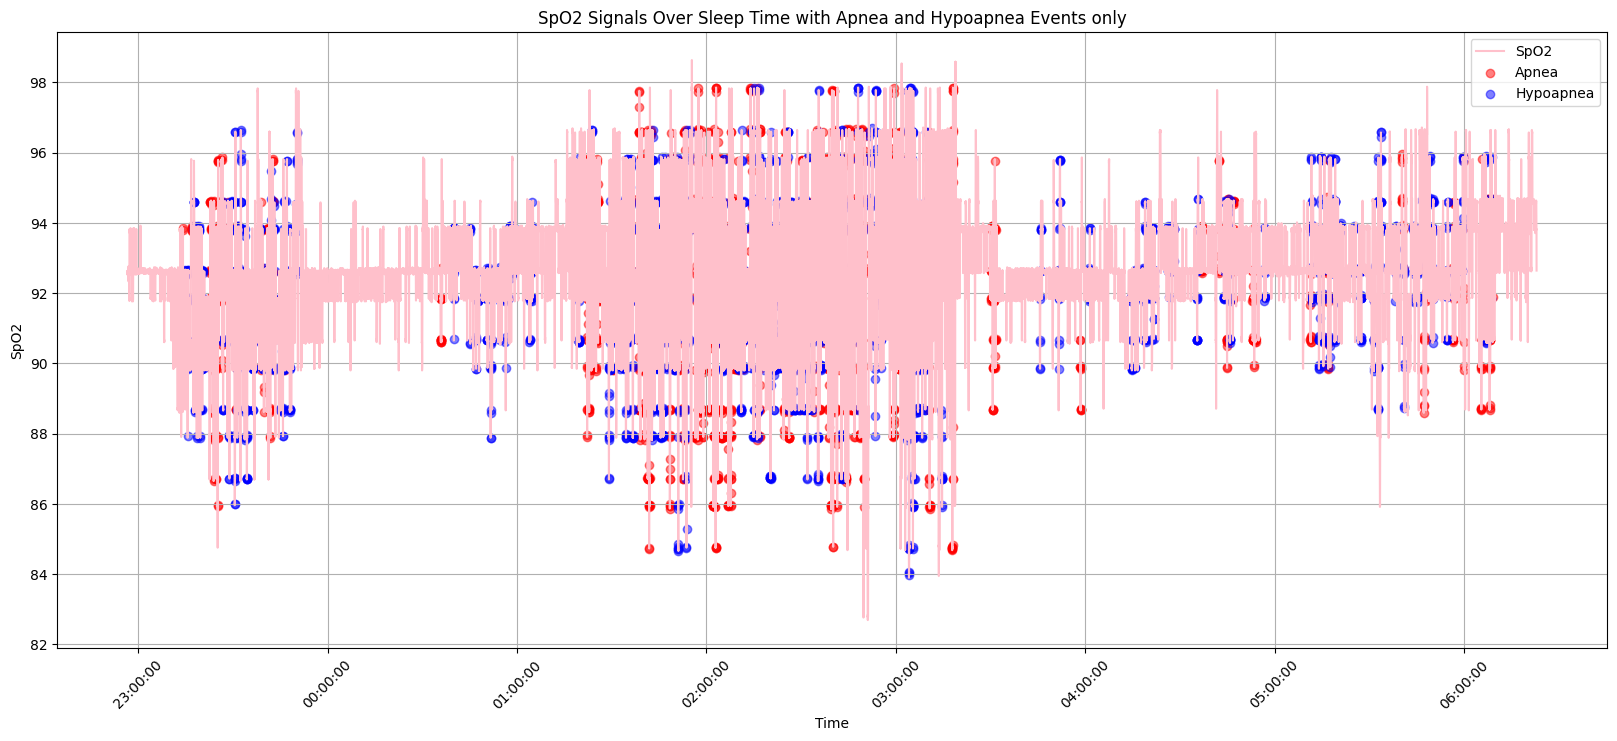

In [8]:
# @title SpO2 Signals Over Sleep Time with Apnea and Hypoapnea Events Part 2 { display-mode: "both" }

# Load the data
df = pd.read_csv(final_csv)

plot_png = output_signals + "signals_plot_with_sleep_apnea.png"

# map "Apnea" events
df['Apnea'] = df['Apnea'].map({'Nothing': 0, 'Apnea': 1, 'Hypoapnea': 2})

# Assuming the columns are in order: date, time, spo2, and pulse
df['Timestamp'] = df['Date'] + ' ' + df['Time']
df['Datetime'] = pd.to_datetime(df['Timestamp'])

# Plotting
plt.figure(figsize=(20, 8))

# Plot SpO2
plt.plot(df['Datetime'], df['SpO2'], label='SpO2', color='pink')

# Highlight Apnea Events
apnea_df = df[df['Apnea'] == 1]
plt.scatter(apnea_df['Datetime'], apnea_df['SpO2'], label='Apnea', color='red', alpha=0.5)

# Highlight Hypoapnea Events
hypoapnea_df = df[df['Apnea'] == 2]
plt.scatter(hypoapnea_df['Datetime'], hypoapnea_df['SpO2'], label='Hypoapnea', color='blue', alpha=0.5)

plt.title('SpO2 Signals Over Sleep Time with Apnea and Hypoapnea Events only')
plt.xlabel('Time')
plt.ylabel('SpO2')
plt.legend()
plt.grid(True)

# Set the format of the x-axis ticks to display only the time part
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=45)

plt.savefig(plot_png)
plt.show()


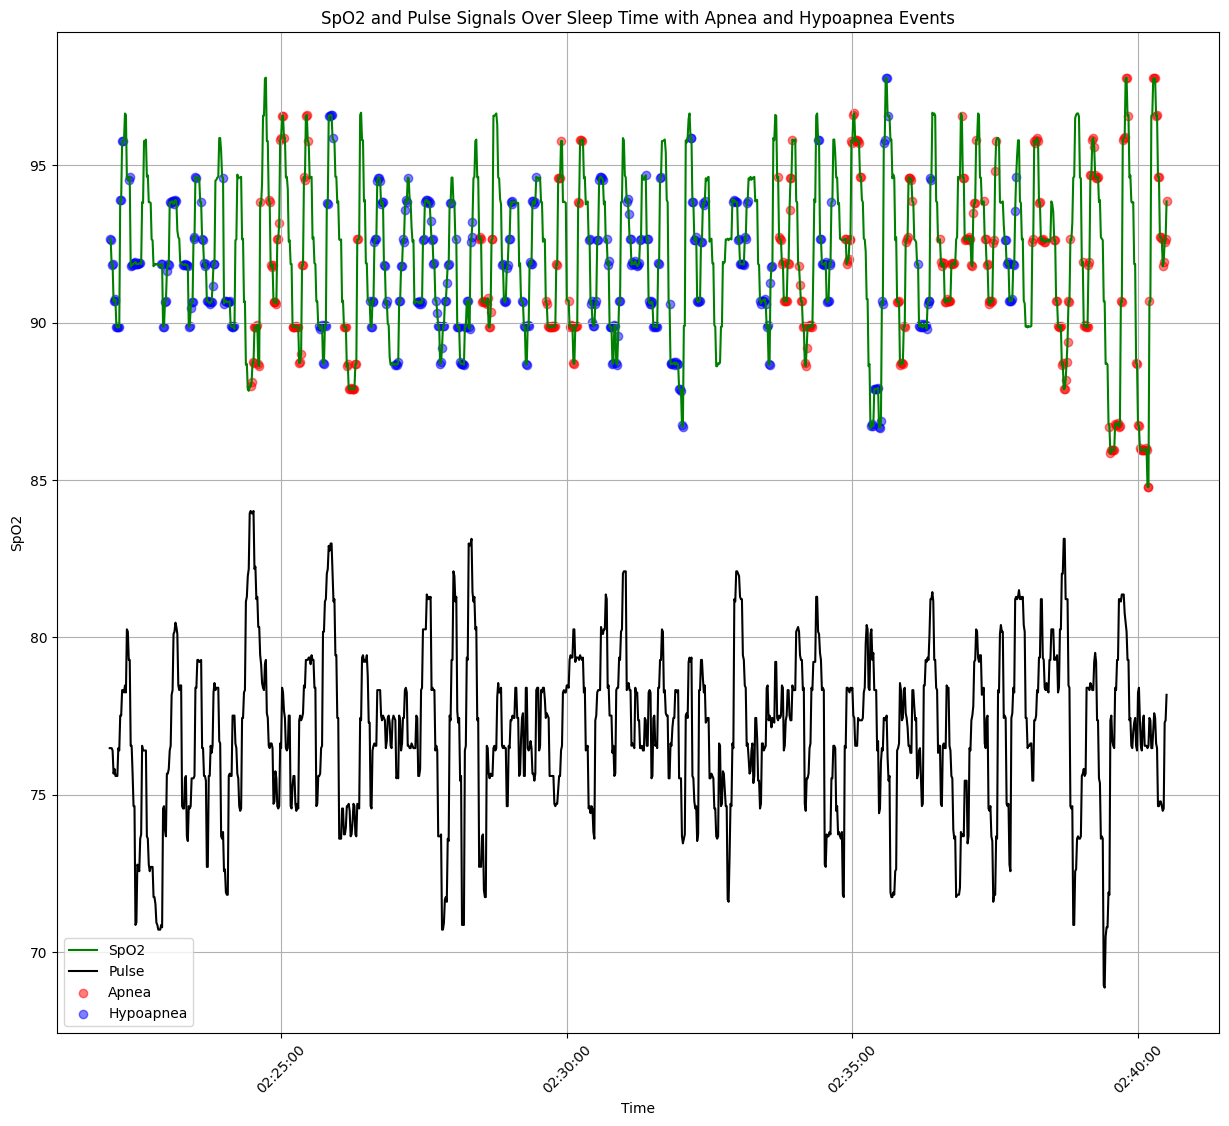

In [9]:
# @title SpO2 and Pulse Signals Over Time with Apnea and Hypoapnea Events { display-mode: "both" }

# Load the data
df = pd.read_csv(final_csv)
plot_png = output_signals + "signals_plot_with_sleep_apnea_zoomed.png"

# map "Apnea" events
df['Apnea'] = df['Apnea'].map({'Nothing': 0, 'Apnea': 1, 'Hypoapnea': 2})

# Assuming the columns are in order: date, time, spo2, and pulse
df['Timestamp'] = df['Date'] + ' ' + df['Time']
df['Datetime'] = pd.to_datetime(df['Timestamp'])

# choose the time slot
start_time = '02:22:00'
end_time = '02:40:30'
selected_df = df[(df['Datetime'].dt.time >= datetime.strptime(start_time, '%H:%M:%S').time()) &
                 (df['Datetime'].dt.time <= datetime.strptime(end_time, '%H:%M:%S').time())]

# Plotting
plt.figure(figsize=(15, 13))

# Plot SpO2
plt.plot(selected_df['Datetime'], selected_df['SpO2'], label='SpO2', color='green')
plt.plot(selected_df['Datetime'], selected_df['Pulse'], label='Pulse', color='black')

# Highlight Apnea Events
apnea_df = selected_df[selected_df['Apnea'] == 1]
plt.scatter(apnea_df['Datetime'], apnea_df['SpO2'], label='Apnea', color='red', alpha=0.5)

# Highlight Hypoapnea Events
hypoapnea_df = selected_df[selected_df['Apnea'] == 2]
plt.scatter(hypoapnea_df['Datetime'], hypoapnea_df['SpO2'], label='Hypoapnea', color='blue', alpha=0.5)

plt.title('SpO2 and Pulse Signals Over Sleep Time with Apnea and Hypoapnea Events')
plt.xlabel('Time')
plt.ylabel('SpO2')
plt.legend()
plt.grid(True)

# Set the format of the x-axis ticks to display only the time part
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=45)

plt.savefig(plot_png)
plt.show()
